In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import shortest_path as sp
import sc_pca
import random
import check_coords

# dir = "/Users/ozgun/Data/Josh/"
dir = "/home/ozgunbabur/Data/Josh/"
umap_file = dir + "umap.tsv"
dist_cos_asis_file = dir + "dist_cosine_asis.tsv"
dist_um_file = dir + "dist_umap.tsv"

In [3]:
distF_cosine = pd.read_table(dist_cos_asis_file, index_col=0)
distF_um = pd.read_table(dist_um_file, index_col=0)

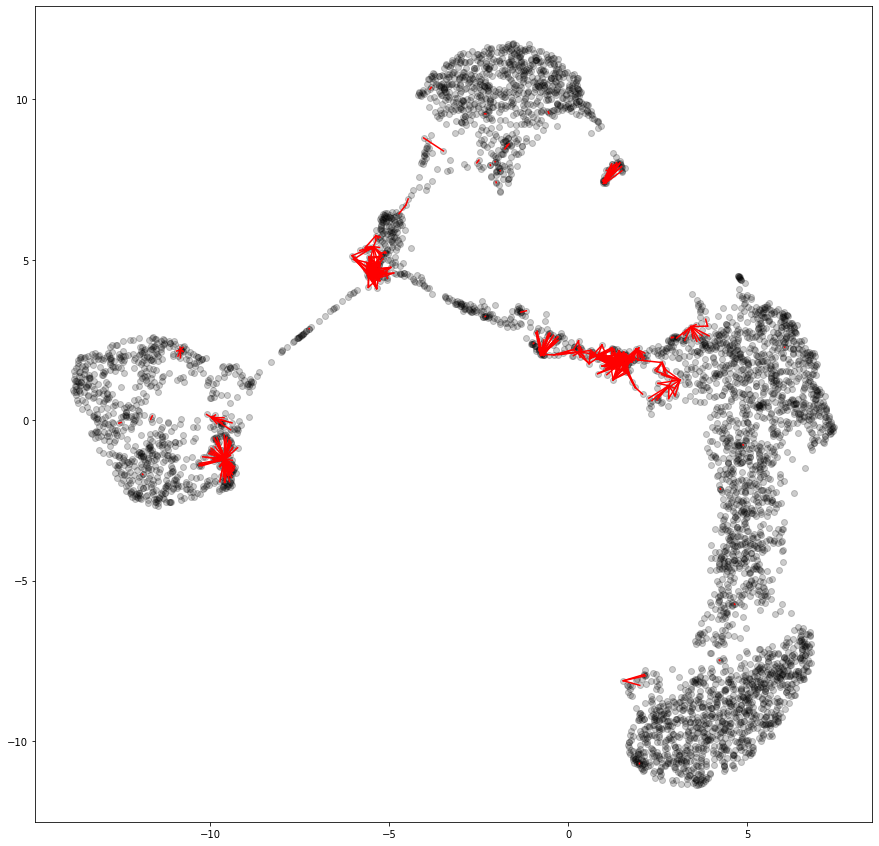

In [30]:
cells = distF_cosine.columns.values.tolist()
mat_cos = distF_cosine.to_numpy()
mat_um = distF_um.to_numpy()

max_u = 25
max_c = 2

table = pd.read_table(umap_file, index_col=0)
mat = table.to_numpy()
plt.figure(figsize=(15, 15))
ax = plt.axes()
ax.scatter(mat[0], mat[1], color = 'k', alpha=0.2)

rats = []

for i in range(len(cells)-1):
    for j in range(i+1, len(cells)):
        dc = mat_cos[i][j] / max_c
        du = math.sqrt(mat_um[i][j]) / max_u
        rat = dc / du

        rats.append(rat)

        if rat > 5 and du < 0.03:
        # if rat < 0.01 and 0.2 < du < 0.3:
            ax.plot([table[cells[i]][0], table[cells[j]][0]], [table[cells[i]][1], table[cells[j]][1]], color = 'r')
            # ax.scatter([table[cells[i]][0], table[cells[j]][0]], [table[cells[i]][1], table[cells[i]][1]], color = 'r', alpha=1)

plt.show()


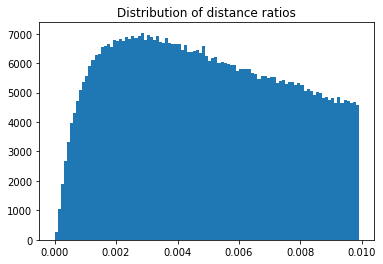

In [25]:
plt.hist(rats, bins=np.arange(0, 0.01, 0.0001))  # arguments are passed to np.histogram
plt.title("Distribution of distance ratios")
plt.show()